In [1]:
import qutip as qt 
import qutip_jax
import jax.numpy as jnp
from jax import jit

In [2]:
qt.settings.core["default_dtype"] = "jax"


In [3]:
def basis_syk(N):
    if (N==1):
        prev = [qt.sigmay()/jnp.sqrt(2),qt.sigmax()/jnp.sqrt(2)]
        return prev
    else:
        prev = basis_syk(N-1)
    ops=[]
    sn= 1/jnp.sqrt(2)  * qt.tensor(qt.qeye(2**(N-1)),qt.sigmay())
    snm1= 1/jnp.sqrt(2)  * qt.tensor(qt.qeye(2**(N-1)),qt.sigmax())
    if N>1:
        ops.append(sn)
        ops.append(snm1)
        for i in prev:
            ops.append(qt.tensor(i,qt.sigmaz()))
    else:
        prev.extend(ops)
    for i in ops:
        i.dims=ops[0].dims
    return ops


In [4]:
psis=basis_syk(4)

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


In [5]:
for i in psis:
    if i.isherm !=True:
        print("proiblem")

In [6]:
i=2
j=2
psis[j]*psis[i] + psis[i]*psis[j] 

Quantum object: dims=[[8, 2], [8, 2]], shape=(16, 16), type='oper', isherm=True
Qobj data =
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]

 Building the Hamiltonian


In [7]:
from jax import random

In [8]:
def four_syk(N):
    psis=basis_syk(N)
    k=2*N
    H=0
    key = random.key(42)
    std= jnp.sqrt(6)*2/(N)**1.5
    J=std*random.normal(key, shape=(3,3,3,3,),)
    for i in range(0,k):
        for j in range(i+1,k):
            for l in range(j+1,k):
                for m in range(l+1,k):
                    H+=psis[i]*psis[j]*psis[l]*psis[m] 
    return H

In [9]:
A=four_syk(8)#ask why it takes forever with jax dia
A

Quantum object: dims=[[128, 2], [128, 2]], shape=(256, 256), type='oper', isherm=True
Qobj data =
[[-7.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j ...
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j -3.50000000e+00+0.j  5.55111512e-17-3.j ...
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j  5.55111512e-17+3.j -3.50000000e+00+0.j ...
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j]
 ...
 [ 0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j ...
  -3.50000000e+00+0.j -5.55111512e-17+3.j  0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j ...
  -5.55111512e-17-3.j -3.50000000e+00+0.j  0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j ...
   0.00000000e+00+0.j  0.00000000e+00+0.j -7.00000000e+00+0.j]]

In [10]:
import itertools


In [11]:
def four_syk(N):
    psis=basis_syk(N)
    k=2*N
    H=0
    key = random.key(42)
    std= jnp.sqrt(6)*2/(N)**1.5
    J=std*random.normal(key, shape=(3,3,3,3,),)
    for i,j,l,m in itertools.combinations(range(N),4):
        H+=psis[m]*psis[l]*psis[j]*psis[i] 
    return H

In [12]:
B=four_syk(8)#ask why it takes forever with jax dia
B

Quantum object: dims=[[128, 2], [128, 2]], shape=(256, 256), type='oper', isherm=True
Qobj data =
[[-1.50000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j ...
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j  5.55111512e-17+0.j  0.00000000e+00-1.j ...
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j  0.00000000e+00+1.j  0.00000000e+00+0.j ...
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j]
 ...
 [ 0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j ...
   0.00000000e+00+0.j  0.00000000e+00+1.j  0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j ...
   0.00000000e+00-1.j  5.55111512e-17+0.j  0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j ...
   0.00000000e+00+0.j  0.00000000e+00+0.j -1.50000000e+00+0.j]]

Now on to the simulation, first the pseudomode bit

In [13]:
from scipy.integrate import quad
import matplotlib.pyplot as plt

In [14]:
import numpy as np

In [15]:
def _matsubara_zero_integrand(t, coup_strength, bath_broad, bath_freq):
    """
    Integral for the zero temperature Matsubara exponentials.
    """
    lam = coup_strength
    gamma = bath_broad
    w0 = bath_freq

    omega = np.sqrt(w0 ** 2 - (gamma / 2) ** 2)
    a = omega + 1j * gamma / 2.0
    aa = np.conjugate(a)

    prefactor = -(lam ** 2 * gamma) / np.pi
    integrand = lambda x: np.real(
        prefactor * ((x * np.exp(-x * t)) / ((a ** 2 + x ** 2) * (aa ** 2 + x ** 2)))
    )
    integrand2 = lambda x: np.imag(
        prefactor * ((x * np.exp(-x * t)) / ((a ** 2 + x ** 2) * (aa ** 2 + x ** 2)))
    )

    return quad(integrand, 0.0, np.inf)[0]+1j*quad(integrand2, 0.0, np.inf)[0]

In [16]:
t=np.linspace(0,50,500)
lam=0.2
gamma=0.05
w0=1
C=np.array([_matsubara_zero_integrand(i,lam,gamma,w0) for i in t])

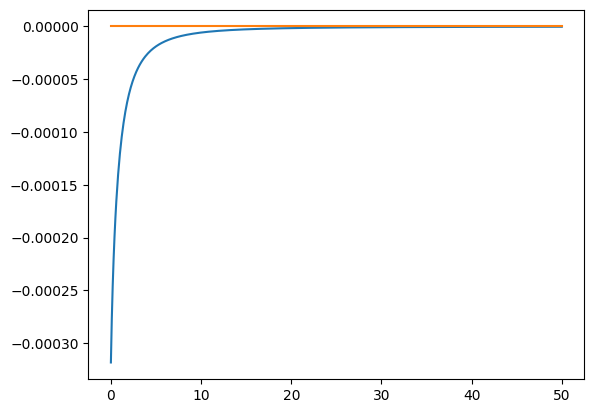

In [17]:
plt.plot(t,np.real(C))
plt.plot(t,np.imag(C))

In [18]:
help(qt.solver.heom.CorrelationFitter)

Help on class CorrelationFitter in module qutip.solver.heom.bofin_fit:

class CorrelationFitter(builtins.object)
 |  CorrelationFitter(Q, T, t, C)
 |  
 |  A helper class for constructing a Bosonic bath from a fit of the
 |  correlation function with exponential terms.
 |  
 |  Parameters
 |  ----------
 |  Q : :obj:`.Qobj`
 |      Operator describing the coupling between system and bath.
 |  T : float
 |      Temperature of the bath.
 |  t : :obj:`np.array.`
 |      The range which to perform the fit.
 |  C : :obj:`np.array.` or callable
 |      The correlation function to be fitted as an array or function.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, Q, T, t, C)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  get_fit(self, Nr=None, Ni=None, final_rmse=2e-05, lower=None, upper=None, sigma=None, guesses=None, full_ansatz=False)
 |      Fit the correlation function with Ni exponential terms
 |      for the imaginary part of the correlation funct

In [19]:
cfiitter=qt.solver.heom.CorrelationFitter(psis[0],1,t,C)

In [20]:
fit=cfiitter.get_fit(Ni=1,Nr=1)

In [21]:
print(fit[1]['summary']) #notice one mode is also a pretty good approximation

Fit correlation class instance: 
 
Result of fitting The Real Part Of                                      |Result of fitting The Imaginary Part                                    
 the Correlation Function with 1 terms:                                 | Of the Correlation Function with 1 terms:                              
                                                                        |                                                                        
 Parameters|    a     |    b     |    c                                 | Parameters|    a     |    b     |    c                                 
 1         |-2.75e-04 |-7.07e-01 |4.58e-19                              | 1         | 0.00e+00 | 0.00e+00 |0.00e+00                              
                                                                        |                                                                        
A  normalized RMSE of  6.70e-04 was obtained for the The Real Part Of   |A  normalized RM

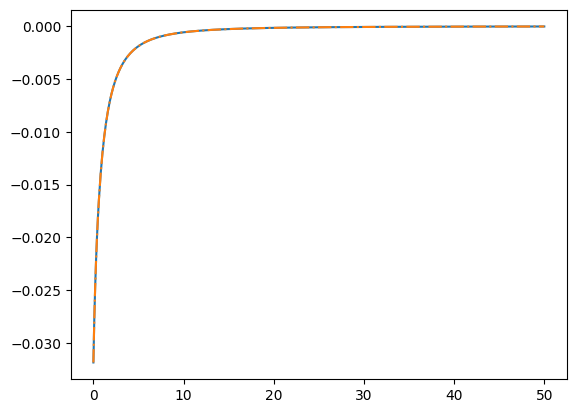

In [22]:
plt.plot(t,100*np.real(fit[0].correlation_function(t)))
plt.plot(t,100*np.real(C),'-.')

continue according to https://arxiv.org/pdf/1903.05892

In [23]:
jnp.tanh(jnp.inf*(5+1j))

Array(1.+0.j, dtype=complex128, weak_type=True)

In [24]:
def C0(t,coupling,gamma,w0,beta=np.inf):
    Gamma= gamma/2
    Omega= jnp.sqrt(w0**2 -Gamma**2)
    tempc0r= (1/np.tanh(beta*(Omega+ Gamma*1j)/2))*jnp.exp(1j*Omega*t)
    c0r=tempc0r+jnp.conjugate(tempc0r)
    c0i= -2j*jnp.sin(Omega*t)
    return (c0r+c0i)*(coupling**2)/(4*Omega)*jnp.exp(-Gamma*t)

In [25]:
help(qt.heom.UnderDampedBath)

Help on class UnderDampedBath in module qutip.solver.heom.bofin_baths:

class UnderDampedBath(BosonicBath)
 |  UnderDampedBath(Q, lam, gamma, w0, T, Nk, combine=True, tag=None)
 |  
 |  A helper class for constructing an under-damped bosonic bath from the
 |  bath parameters (see parameters below).
 |  
 |  Parameters
 |  ----------
 |  Q : Qobj
 |      Operator describing the coupling between system and bath.
 |  
 |  lam : float
 |      Coupling strength.
 |  
 |  gamma : float
 |      Bath spectral density cutoff frequency.
 |  
 |  w0 : float
 |      Bath spectral density resonance frequency.
 |  
 |  T : float
 |      Bath temperature.
 |  
 |  Nk : int
 |      Number of exponential terms used to approximate the bath correlation
 |      functions.
 |  
 |  combine : bool, default True
 |      Whether to combine exponents with the same frequency (and coupling
 |      operator). See :meth:`BosonicBath.combine` for details.
 |  
 |  tag : optional, str, tuple or any other object
 |  

In [26]:
bath=qt.heom.UnderDampedBath(qt.sigmaz(),lam,gamma,w0,1e-18,5) # functions don't take zero because 1/T should be fixed

/home/mcditoos/qutip_gsoc_app/qutip/solver/heom/bofin_baths.py:425: RuntimeWarning: overflow encountered in exp
  return (1 / (np.exp(w / self.T) - 1))


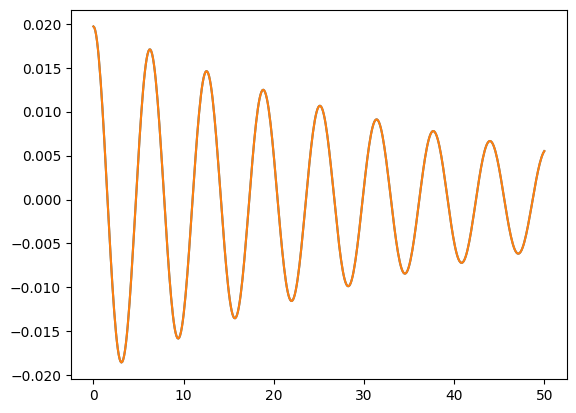

In [27]:
plt.plot(t,jnp.real(C0(t,lam,gamma,w0)+np.real(fit[0].correlation_function(t))))
plt.plot(t,np.real(bath.correlation_function(t)))
plt.show()

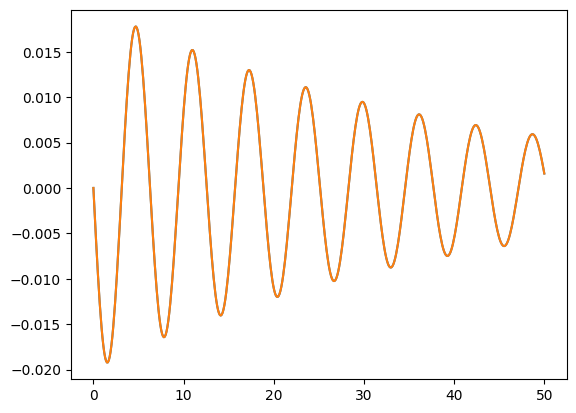

In [28]:
plt.plot(t,jnp.imag(C0(t,lam,gamma,w0)+np.real(fit[0].correlation_function(t))))
plt.plot(t,np.imag(bath.correlation_function(t)))
plt.show()

# Now I just need to construct my pseudomodes according to 

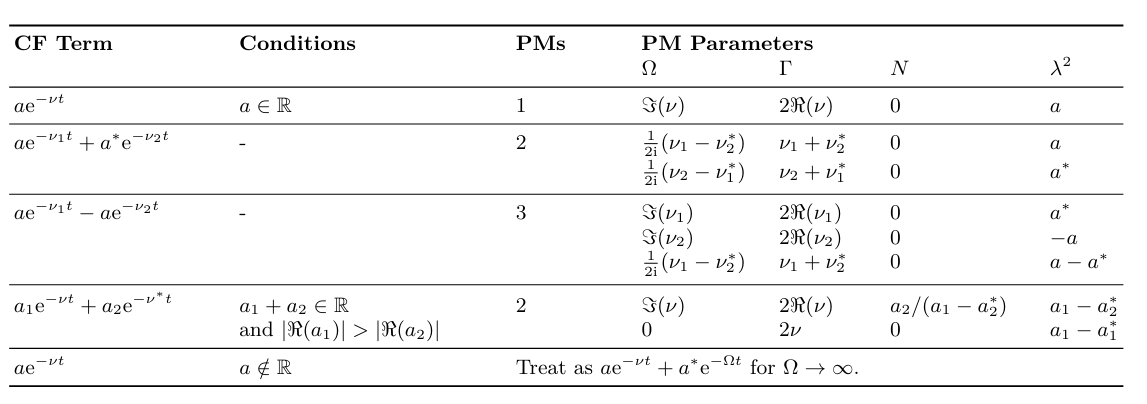

In [29]:
from IPython.display import display, Markdown
display(Markdown("# In my case I have two exponentials: given by \n -Non-Matsubara \n $a=\\frac{\lambda^{2}}{2 \Omega}$ and $\\nu=(\Gamma+i\Omega)t$ \n - Matsubara "
                 f"a={fit[1]['params_real'][0][0]:2e} and" rf" $\nu$={fit[1]['params_real'][1][0]+1j*fit[1]['params_real'][2][0]:2e}") )

# In my case I have two exponentials: given by 
 -Non-Matsubara 
 $a=\frac{\lambda^{2}}{2 \Omega}$ and $\nu=(\Gamma+i\Omega)t$ 
 - Matsubara a=-2.748599e-04 and $\nu$=-7.070833e-01+4.579851e-19j

So i can get away with two pseudomodes, as both as are real 

# I can assume the exponent to be real and therefore energy of that mode to be 0

In [30]:
cutoff=4
def tensor_id(op,pos,cutoff=cutoff):
    if pos==0:
        return qt.tensor([op,qt.qeye(cutoff),qt.qeye(cutoff)])
    if pos==1:
        return qt.tensor([qt.qeye(2),op,qt.qeye(cutoff),])
    else:
        return qt.tensor([qt.qeye(2),qt.qeye(cutoff),op])
Gamma= gamma/2
Omega= np.sqrt(w0**2 -Gamma**2)
Hsys=tensor_id(qt.sigmaz()/2 + qt.sigmax()/2 ,0)
Q=tensor_id(qt.sigmaz(),0)
a=tensor_id(qt.destroy(cutoff),1)
b=tensor_id(qt.destroy(cutoff),2)
Hpm= Omega*a.dag()*a+fit[1]['params_real'][2][0]*b.dag()*b
Hsys_pm=np.sqrt((lam**2/(2*Omega)))*Q*(a+a.dag())+np.sqrt(fit[1]['params_real'][0][0]+0j)*Q*(b+b.dag())
H=Hsys+Hsys_pm+Hpm

Now I just simulate with mesolve

In [31]:
tlist = np.linspace(0, 250, 1000)

In [32]:
initial_ket = qt.basis(2, 1)
psi0 = qt.tensor(initial_ket, qt.basis(cutoff,0), qt.basis(cutoff,0))

In [33]:
fit[1]['params_real'][1][0]

-0.7070833344302458

In [34]:
c_ops = [np.sqrt(gamma)*a, np.sqrt(fit[1]['params_real'][1][0]+0j)*b]
e_ops = [tensor_id(qt.sigmaz(),0)]


In [35]:
pseudomode= qt.mesolve(H, psi0, tlist, c_ops, e_ops)
outputpm = (pseudomode.expect[0] + 1)/2


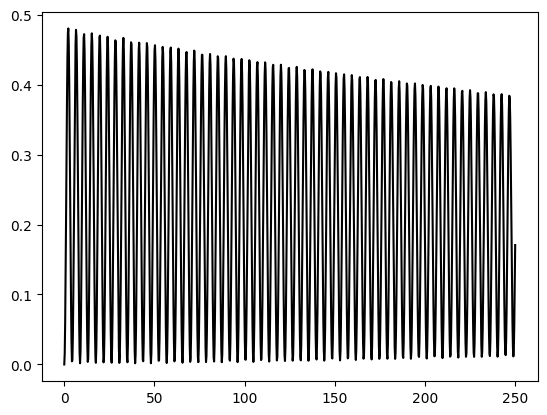

In [37]:
plt.plot(tlist, outputpm, color="k")
#plt.plot(tlist, sdd,"-.", color="r")
plt.show()

In [49]:
#plt.plot(tlist, outputpm, color="b")
#plt.plot(tlist, outputpm-sdd, color="k")
plt.show()

Cross-check agaisnt HEOM

/home/mcditoos/qutip_gsoc_app/qutip/solver/heom/bofin_baths.py:425: RuntimeWarning: overflow encountered in exp
  return (1 / (np.exp(w / self.T) - 1))


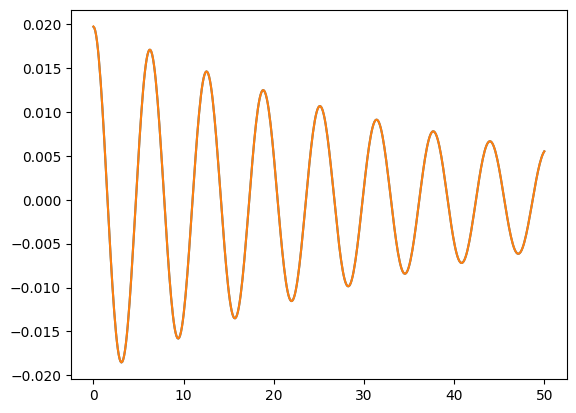

In [39]:
plt.plot(t,np.real(bath.correlation_function(t)))
plt.plot(t,jnp.real(C0(t,lam,gamma,w0))+np.real(fit[0].correlation_function_approx(t)))

plt.show()

In [40]:
cfiitter2=qt.solver.heom.CorrelationFitter(qt.sigmaz(),0,t,bath.correlation_function)

In [41]:
fit2=cfiitter2.get_fit(Ni=1,Nr=4)

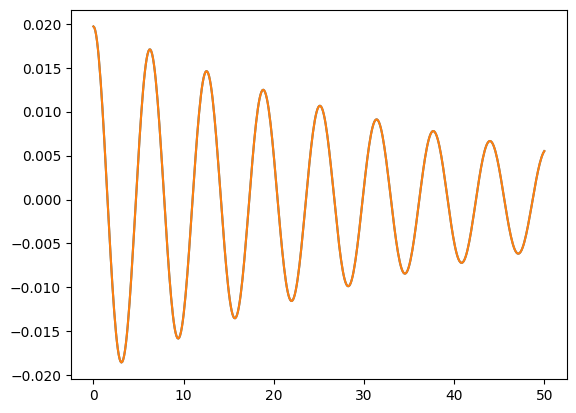

In [42]:
plt.plot(t,np.real(bath.correlation_function(t)))
plt.plot(t,jnp.real(C0(t,lam,gamma,w0))+np.real(fit[0].correlation_function(t)))

plt.show()

In [43]:
print(fit2[1]['summary']) #notice one mode is also a pretty good approximation

Fit correlation class instance: 
 
Result of fitting The Real Part Of                                      |Result of fitting The Imaginary Part                                    
 the Correlation Function with 4 terms:                                 | Of the Correlation Function with 1 terms:                              
                                                                        |                                                                        
 Parameters|    a     |    b     |    c                                 | Parameters|    a     |    b     |    c                                 
 1         |-2.50e-01 |-6.07e-01 |2.44e-05                              | 1         |-2.00e-02 |-2.50e-02 |1.00e+00                              
 2         | 2.50e-01 |-6.07e-01 |1.45e-02                              |                                                                        
 3         | 2.68e-01 |-2.50e-02 |9.99e-01                              |A  normalized RM

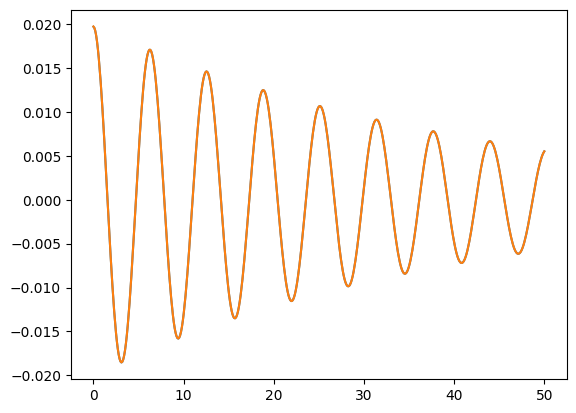

In [44]:
plt.plot(t,np.real(fit2[0].correlation_function_approx(t)))
plt.plot(t,jnp.real(C0(t,lam,gamma,w0))+np.real(fit[0].correlation_function_approx(t)))

plt.show()

In [45]:
solver = qt.heom.HEOMSolver(qt.sigmaz()/2+qt.sigmax()/2,
                    [fit2[0]], max_depth=7)
result = solver.run(initial_ket*initial_ket.dag(), tlist)

10.0%. Run time:   4.78s. Est. time left: 00:00:00:42
20.0%. Run time:  12.56s. Est. time left: 00:00:00:50
30.0%. Run time:  19.75s. Est. time left: 00:00:00:46
40.0%. Run time:  26.39s. Est. time left: 00:00:00:39
50.1%. Run time:  33.67s. Est. time left: 00:00:00:33
60.1%. Run time:  39.80s. Est. time left: 00:00:00:26
70.1%. Run time:  46.10s. Est. time left: 00:00:00:19
80.1%. Run time:  52.39s. Est. time left: 00:00:00:13
90.1%. Run time:  59.07s. Est. time left: 00:00:00:06
100.0%. Run time:  66.30s. Est. time left: 00:00:00:00
Total run time:  66.30s


In [46]:
sdd=[i[0,0] for i in result.states]

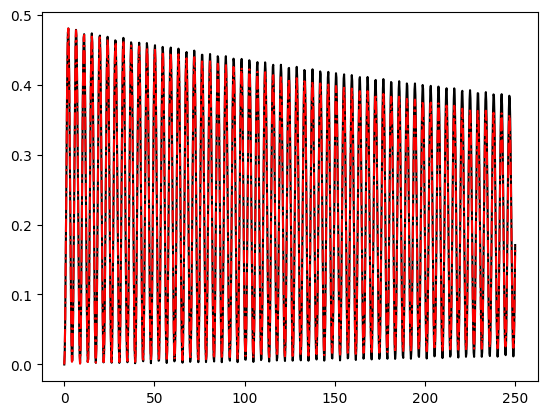

In [48]:
plt.plot(tlist, outputpm, color="k")
plt.plot(tlist, sdd,"-.", color="r")
#plt.xlim(0,100)
plt.show()# Add master equations to the miz and show this ones in your thesis